In [294]:
#data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
import sklearn

#visualization
import seaborn as sns
import matplotlib.pyplot as plt

#machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [295]:
#Acquire data
train_df = pd.read_csv('../Data/train_data.csv')
test_df = pd.read_csv('../Data/test_data.csv')

combine = [train_df, test_df]

In [296]:
print(train_df.columns.values)

['Supplier' 'Fab Plant' 'Fab WW' 'Wafer Coat Tool' 'Wafer Coat MT'
 'Wafer Coat Flux Lot' 'Wafer Coat Thickness Mean' '% Bin 15' 'Unnamed: 8'
 'Unnamed: 9' 'Unnamed: 10' 'Unnamed: 11' 'Unnamed: 12' 'Unnamed: 13'
 'Unnamed: 14' 'Unnamed: 15' 'Unnamed: 16' 'Unnamed: 17']


In [297]:
train_df = train_df.drop("Unnamed: 8", axis=1)
train_df = train_df.drop("Unnamed: 9", axis=1)
train_df = train_df.drop("Unnamed: 10", axis=1)
train_df = train_df.drop("Unnamed: 11", axis=1)
train_df = train_df.drop("Unnamed: 12", axis=1)
train_df = train_df.drop("Unnamed: 13", axis=1)
train_df = train_df.drop("Unnamed: 14", axis=1)
train_df = train_df.drop("Unnamed: 15", axis=1)
train_df = train_df.drop("Unnamed: 16", axis=1)
train_df = train_df.drop("Unnamed: 17", axis=1)
train_df = train_df.drop("Fab WW", axis=1)
train_df = train_df.drop("Wafer Coat MT", axis=1)

In [298]:
print(train_df.columns.values)

['Supplier' 'Fab Plant' 'Wafer Coat Tool' 'Wafer Coat Flux Lot'
 'Wafer Coat Thickness Mean' '% Bin 15']


In [299]:
test_df = test_df.drop("Unnamed: 9", axis=1)
test_df = test_df.drop("Unnamed: 10", axis=1)
test_df = test_df.drop("Unnamed: 11", axis=1)
test_df = test_df.drop("Unnamed: 12", axis=1)
test_df = test_df.drop("Unnamed: 13", axis=1)
test_df = test_df.drop("Unnamed: 14", axis=1)
test_df = test_df.drop("Unnamed: 15", axis=1)
test_df = test_df.drop("Unnamed: 16", axis=1)
test_df = test_df.drop("Unnamed: 17", axis=1)
test_df = test_df.drop("Unnamed: 8", axis=1)
test_df = test_df.drop("Fab WW", axis=1)
test_df = test_df.drop("Wafer Coat MT", axis=1)

In [300]:
print(test_df.columns.values)

['Supplier' 'Fab Plant' 'Wafer Coat Tool' 'Wafer Coat Flux Lot'
 'Wafer Coat Thickness Mean' '% Bin 15']


In [301]:
train_df.head()

,Supplier,Fab Plant,Wafer Coat Tool,Wafer Coat Flux Lot,Wafer Coat Thickness Mean,% Bin 15
0,Supp1,Fab 3,WC 2,1603222,110.3,2.48
1,Supp1,Fab 3,WC 2,1603111,95.8,2.02
2,Supp1,Fab 3,WC 3,1603222,102.4,2.27
3,Supp1,Fab 3,WC 2,1603222,95.2,1.99
4,Supp1,Fab 3,WC 2,1603222,107.6,2.74


In [302]:
train_df.tail()

,Supplier,Fab Plant,Wafer Coat Tool,Wafer Coat Flux Lot,Wafer Coat Thickness Mean,% Bin 15
1208,Supp2,Fab 3,WC 2,1603222,95.6,2.92
1209,Supp2,Fab 3,WC 1,1603222,92.0,2.11
1210,Supp2,Fab 3,WC 1,1603222,94.2,1.86
1211,Supp2,Fab 3,WC 2,1603333,107.7,0.00
1212,Supp2,Fab 3,WC 2,1603222,109.7,1.76


In [303]:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Supplier                   1213 non-null   object 
 1   Fab Plant                  1213 non-null   object 
 2   Wafer Coat Tool            1213 non-null   object 
 3   Wafer Coat Flux Lot        1213 non-null   int64  
 4   Wafer Coat Thickness Mean  1213 non-null   float64
 5   % Bin 15                   1213 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 57.0+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 523 entries, 0 to 522
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Supplier                   523 non-null    object 
 1   Fab Plant                  523 non-null    object 
 2   Wafer Coa

In [304]:
train_df.describe()

,Wafer Coat Flux Lot,Wafer Coat Thickness Mean,% Bin 15
count,1.213000e+03,1213.000000,1213.000000
mean,1.603192e+06,100.351855,2.056488
std,5.386944e+01,10.227836,1.911395
min,1.603111e+06,66.300000,0.000000
25%,1.603111e+06,93.600000,1.410000
50%,1.603222e+06,100.700000,1.980000
75%,1.603222e+06,107.200000,2.430000
max,1.603333e+06,137.700000,25.000000


In [305]:
#Analyze by pivoting features
train_df[['Supplier', '% Bin 15']].groupby(['Supplier'], as_index=False).mean().sort_values(by='Supplier', ascending=False)

,Supplier,% Bin 15
1,Supp2,2.056436
0,Supp1,2.056540


In [306]:
train_df[['Fab Plant', '% Bin 15']].groupby(['Fab Plant'], as_index=False).mean().sort_values(by='Fab Plant', ascending=False)

,Fab Plant,% Bin 15
2,Fab 3,2.165622
1,Fab 2,1.959000
0,Fab 1,1.812171


In [307]:
train_df[['Wafer Coat Tool', '% Bin 15']].groupby(['Wafer Coat Tool'], as_index=False).mean().sort_values(by='Wafer Coat Tool', ascending=False)

,Wafer Coat Tool,% Bin 15
2,WC 3,2.139598
1,WC 2,1.937173
0,WC 1,2.121552


In [308]:
train_df[['Wafer Coat Flux Lot', '% Bin 15']].groupby(['Wafer Coat Flux Lot'], as_index=False).mean().sort_values(by='Wafer Coat Flux Lot', ascending=False)

,Wafer Coat Flux Lot,% Bin 15
2,1603333,2.130000
1,1603222,2.086302
0,1603111,1.979368


In [309]:
train_df[['Wafer Coat Thickness Mean', '% Bin 15']].groupby(['Wafer Coat Thickness Mean'], as_index=False).mean().sort_values(by='Wafer Coat Thickness Mean', ascending=False)

,Wafer Coat Thickness Mean,% Bin 15
391,137.7,2.36
390,131.3,2.11
389,130.7,2.16
388,130.2,2.33
387,129.2,1.77
...,...,...
4,73.9,0.00
3,73.5,1.83
2,71.9,1.75
1,66.7,1.93


In [310]:
train_df['Status Bin15'] = 0

In [311]:
train_df.head()

,Supplier,Fab Plant,Wafer Coat Tool,Wafer Coat Flux Lot,Wafer Coat Thickness Mean,% Bin 15,Status Bin15
0,Supp1,Fab 3,WC 2,1603222,110.3,2.48,0
1,Supp1,Fab 3,WC 2,1603111,95.8,2.02,0
2,Supp1,Fab 3,WC 3,1603222,102.4,2.27,0
3,Supp1,Fab 3,WC 2,1603222,95.2,1.99,0
4,Supp1,Fab 3,WC 2,1603222,107.6,2.74,0


In [312]:
def addValue(row):
    if row['% Bin 15'] >= 2.0:
       return 'Bad'
    else:
        return 'Good'

train_df['Status Bin15'] = train_df.apply(addValue, axis=1)
train_df.head()

,Supplier,Fab Plant,Wafer Coat Tool,Wafer Coat Flux Lot,Wafer Coat Thickness Mean,% Bin 15,Status Bin15
0,Supp1,Fab 3,WC 2,1603222,110.3,2.48,Bad
1,Supp1,Fab 3,WC 2,1603111,95.8,2.02,Bad
2,Supp1,Fab 3,WC 3,1603222,102.4,2.27,Bad
3,Supp1,Fab 3,WC 2,1603222,95.2,1.99,Good
4,Supp1,Fab 3,WC 2,1603222,107.6,2.74,Bad


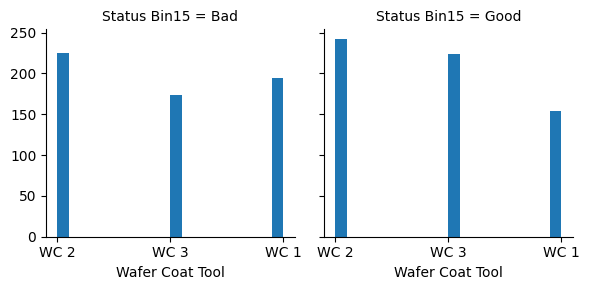

In [313]:
g =  sns.FacetGrid(train_df, col='Status Bin15')
g.map(plt.hist, 'Wafer Coat Tool', bins=20)

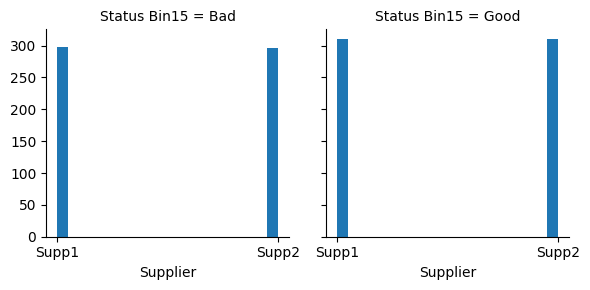

In [314]:
g =  sns.FacetGrid(train_df, col='Status Bin15')
g.map(plt.hist, 'Supplier', bins=20)

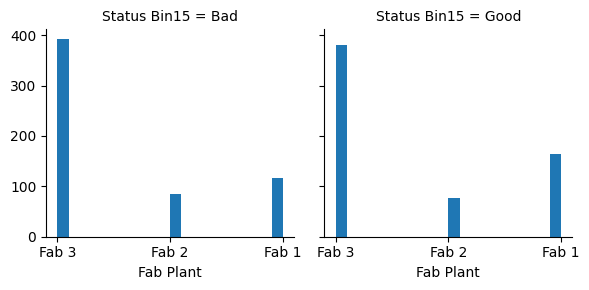

In [315]:
g =  sns.FacetGrid(train_df, col='Status Bin15')
g.map(plt.hist, 'Fab Plant', bins=20)

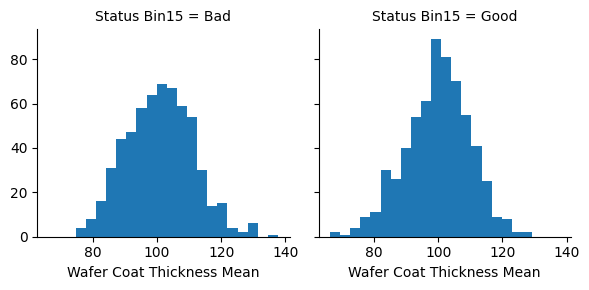

In [316]:
g =  sns.FacetGrid(train_df, col='Status Bin15')
g.map(plt.hist, 'Wafer Coat Thickness Mean', bins=20)

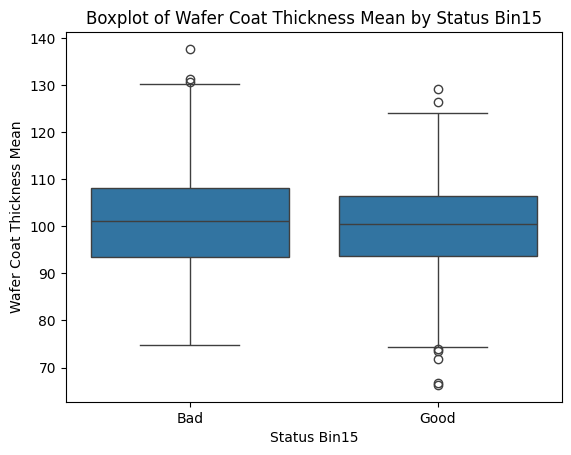

In [317]:
sns.boxplot(x='Status Bin15', y='Wafer Coat Thickness Mean', data=train_df)
plt.title('Boxplot of Wafer Coat Thickness Mean by Status Bin15')
plt.show()

/var/folders/p3/hbxtvs2d07v46tknxn0djmf80000gn/T/ipykernel_18681/2993421974.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Status Bin15', data=train_df, palette='Set2')


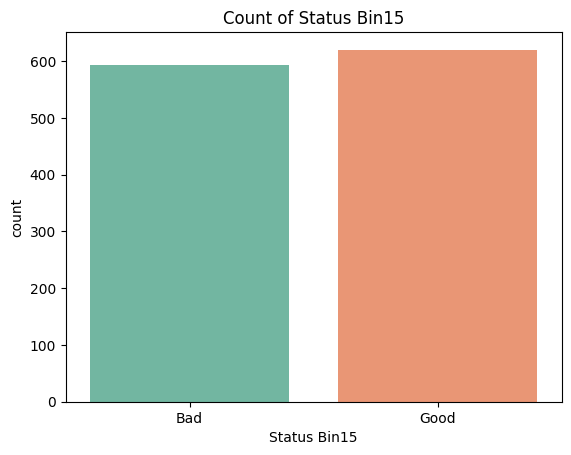

In [318]:
sns.countplot(x='Status Bin15', data=train_df, palette='Set2')
plt.title('Count of Status Bin15')
plt.show()

In [319]:
train_df = train_df.drop("Status Bin15", axis=1)

In [320]:
train_df.head()

,Supplier,Fab Plant,Wafer Coat Tool,Wafer Coat Flux Lot,Wafer Coat Thickness Mean,% Bin 15
0,Supp1,Fab 3,WC 2,1603222,110.3,2.48
1,Supp1,Fab 3,WC 2,1603111,95.8,2.02
2,Supp1,Fab 3,WC 3,1603222,102.4,2.27
3,Supp1,Fab 3,WC 2,1603222,95.2,1.99
4,Supp1,Fab 3,WC 2,1603222,107.6,2.74


In [321]:
#Create label encoder for String value
from sklearn.preprocessing import LabelEncoder
le_supplier = LabelEncoder()
train_df['Supplier'] = le_supplier.fit_transform(train_df['Supplier'])
train_df['Supplier'].unique()

array([0, 1])

In [322]:
le_fabPlant = LabelEncoder()
train_df['Fab Plant'] = le_fabPlant.fit_transform(train_df['Fab Plant'])
train_df['Fab Plant'].unique()

array([2, 1, 0])

In [323]:
le_WaferCoatTool = LabelEncoder()
train_df['Wafer Coat Tool'] = le_WaferCoatTool.fit_transform(train_df['Wafer Coat Tool'])
train_df['Wafer Coat Tool'].unique()

array([1, 2, 0])

In [324]:
le_WaferLot = LabelEncoder()
train_df['Wafer Coat Flux Lot'] = le_WaferLot.fit_transform(train_df['Wafer Coat Flux Lot'])
train_df['Wafer Coat Flux Lot'].unique()

array([1, 0, 2])

In [325]:
train_df.head()

,Supplier,Fab Plant,Wafer Coat Tool,Wafer Coat Flux Lot,Wafer Coat Thickness Mean,% Bin 15
0,0,2,1,1,110.3,2.48
1,0,2,1,0,95.8,2.02
2,0,2,2,1,102.4,2.27
3,0,2,1,1,95.2,1.99
4,0,2,1,1,107.6,2.74


In [326]:
le_supplier = LabelEncoder()
test_df['Supplier'] = le_supplier.fit_transform(test_df['Supplier'])
test_df['Supplier'].unique()

le_WaferCoatTool = LabelEncoder()
test_df['Wafer Coat Tool'] = le_WaferCoatTool.fit_transform(test_df['Wafer Coat Tool'])
test_df['Wafer Coat Tool'].unique()

le_WaferLot = LabelEncoder()
test_df['Wafer Coat Flux Lot'] = le_WaferLot.fit_transform(test_df['Wafer Coat Flux Lot'])
test_df['Wafer Coat Flux Lot'].unique()

le_fabPlant = LabelEncoder()
test_df['Fab Plant'] = le_fabPlant.fit_transform(test_df['Fab Plant'])
test_df['Fab Plant'].unique()

array([2, 1, 0])

In [327]:
test_df.head()

,Supplier,Fab Plant,Wafer Coat Tool,Wafer Coat Flux Lot,Wafer Coat Thickness Mean,% Bin 15
0,0,2,0,1,119.2,2.71
1,0,2,0,1,101.3,2.17
2,0,2,1,1,104.3,2.29
3,0,2,1,0,107.3,2.28
4,0,2,1,1,106.1,2.56


In [328]:
# Model, predict and solve
X_train = train_df.drop("% Bin 15", axis=1)
Y_train = train_df["% Bin 15"]
X_test = test_df.drop("% Bin 15", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((1213, 5), (1213,), (523, 5))

In [329]:
test_df.head()

,Supplier,Fab Plant,Wafer Coat Tool,Wafer Coat Flux Lot,Wafer Coat Thickness Mean,% Bin 15
0,0,2,0,1,119.2,2.71
1,0,2,0,1,101.3,2.17
2,0,2,1,1,104.3,2.29
3,0,2,1,0,107.3,2.28
4,0,2,1,1,106.1,2.56


In [330]:
#Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
linear_reg = LinearRegression()
linear_reg.fit(X_train, Y_train)
Y_pred = linear_reg.predict(X_test)
lr = round(linear_reg.score(X_train, Y_train) * 100, 2)
lr

0.7

In [331]:
#Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
dec_tree_reg = DecisionTreeRegressor(random_state = 0)
dec_tree_reg.fit(X_train, Y_train)
Y_pred = dec_tree_reg.predict(X_test)
dtr = round(dec_tree_reg.score(X_train, Y_train) * 100, 2)
dtr

95.37

In [332]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
random_forest_reg = RandomForestRegressor(random_state=0)
random_forest_reg.fit(X_train, Y_train)
Y_pred = random_forest_reg.predict(X_test)
rfr = round(random_forest_reg.score(X_train, Y_train) * 100, 2)
rfr

79.46

In [333]:
#Grid Search CV
from sklearn.model_selection import GridSearchCV

max_depth = [None, 2,4,6,8,10,12]
parameters = {"max_depth":max_depth}

regressor = DecisionTreeRegressor(random_state=0)
gs = GridSearchCV(regressor, parameters, scoring='neg_mean_squared_error')
gs.fit(X_train, Y_train)
regressor = gs.best_estimator_
regressor.fit(X_train, Y_train)
Y_pred_pred = regressor.predict(X_test)
gscv = round(regressor.score(X_train, Y_train) * 100, 2)
gscv

2.22

In [334]:
#Create table to display model confidence score

models = pd.DataFrame({
    'Model' : ['Linear Regression', 'Decision Tree Regressor', 'Random Forest Regressor',
                'Grid Search CV'],
    'Score' : [lr, dtr, rfr, gscv]})
models.sort_values(by='Score', ascending = False)

,Model,Score
1,Decision Tree Regressor,95.37
2,Random Forest Regressor,79.46
3,Grid Search CV,2.22
0,Linear Regression,0.70


In [335]:
# Create for the apps
X = np.arrayX = np.array([["Supp2", "Fab 3", 'WC 1', '1603222', 92]])
X

array([['Supp2', 'Fab 3', 'WC 1', '1603222', '92']], dtype='<U21')

In [336]:
X[:,0] = le_supplier.transform(X[:,0])
X[:,1] = le_fabPlant.transform(X[:,1])
X[:,2] = le_WaferCoatTool.transform(X[:,2])
X[:,3] = le_WaferLot.transform(X[:,3])
X = X.astype(float)
X

array([[ 1.,  2.,  0.,  1., 92.]])

In [337]:
Y_pred = dec_tree_reg.predict(X)
Y_pred

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([2.11])

In [338]:
#Import model for build application
import pickle
data = {"model" : dec_tree_reg, "le_supplier" : le_supplier, "le_fabPlant" : le_fabPlant,
"le_WaferCoatTool": le_WaferCoatTool, "le_WaferLot":le_WaferLot}
with open('saved_steps.pkl', 'wb') as file:
    pickle.dump(data,file)

In [339]:
with open('saved_steps.pkl', 'rb') as file:
    data = pickle.load(file)

dec_tree_reg_loaded = data["model"]
le_supplier = data["le_supplier"]
le_fabPlant = data["le_fabPlant"]
le_WaferCoatTool = data["le_WaferCoatTool"]
le_WaferLot = data["le_WaferLot"]

In [340]:
Y_pred = dec_tree_reg_loaded.predict(X)
Y_pred

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([2.11])